# Import library

In [21]:
import numpy as np
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
#from pandas import to_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix

# Some research results

- Regular blink have a time length of 100~400ms in 30fps
- Open-close-open eye accomplished in 3~12 frames
- 0.05 <= EAR <= 0.25
- Normal blink 3 frames, quick blink 2 frames

# Load data

In [3]:
dataset_6f = pd.read_csv("../../../eye_blink/Eye-blinking-SVM/balanced_preproc/balanced_preproc_all.csv", index_col="frame")

In [12]:
video_1=pd.read_csv("../../../eye_blink/Eye-blinking-SVM/balanced_preproc/balanced_preproc_122013_223310_cam.csv", sep=",", index_col="frame")
video_2=pd.read_csv("../../../eye_blink/Eye-blinking-SVM/balanced_preproc/balanced_preproc_122013_224532_cam.csv", sep=",", index_col="frame")
video_3=pd.read_csv("../../../eye_blink/Eye-blinking-SVM/balanced_preproc/balanced_preproc_122013_230103_cam.csv", sep=",", index_col="frame")
video_4=pd.read_csv("../../../eye_blink/Eye-blinking-SVM/balanced_preproc/balanced_preproc_122013_230654_cam.csv", sep=",", index_col="frame")
video_5=pd.read_csv("../../../eye_blink/Eye-blinking-SVM/balanced_preproc/balanced_preproc_122013_151644_cam.csv", sep=",", index_col="frame")
video_6=pd.read_csv("../../../eye_blink/Eye-blinking-SVM/balanced_preproc/balanced_preproc_122013_152435_cam.csv", sep=",", index_col="frame")
video_7=pd.read_csv("../../../eye_blink/Eye-blinking-SVM/balanced_preproc/balanced_preproc_122013_153916_cam.csv", sep=",", index_col="frame")
video_8=pd.read_csv("../../../eye_blink/Eye-blinking-SVM/balanced_preproc/balanced_preproc_122013_154548_cam.csv", sep=",", index_col="frame")
dataset_12f=pd.concat([video_1,video_2,video_3,video_4,video_5,video_6,video_7,video_8])

# Dev

In [24]:
def prev_to_csv(X,scaler=scaler,model=model):
    rescaledX = scaler.transform(X)
    predictions = model.predict(rescaledX)
    newdata = DataFrame(predictions, index=X.index, columns=["blink"])
    return newdata

def moving_av(mylist, N):
    cumsum, moving_aves = [0], []
    for i, x in enumerate(mylist, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
    return moving_aves

# 6-frames

In [77]:
# Split-out validation dataset
array = dataset_6f.values
X = array[:,:dataset_6f.shape[1]-1].astype(float)
Y = array[:,dataset_6f.shape[1]-1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


# prepare the model
# prepare the model
scaler_6f = StandardScaler().fit(X_train)
rescaledX = scaler_6f.transform(X_train)
model_6f = SVC(C=1.7)  #choose our best model and C
model_6f.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler_6f.transform(X_validation)
predictions = model_6f.predict(rescaledValidationX)

In [78]:
accuracy_score(Y_validation, predictions)

0.9483050847457627

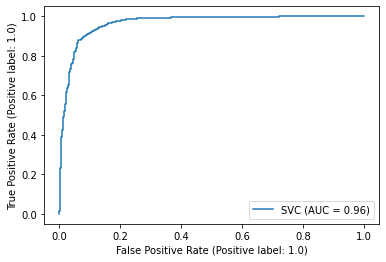

In [79]:
plot_roc_curve(model_6f, X_validation, Y_validation)

In [80]:
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(roc_auc_score(Y_validation,predictions))

[[539  39]
 [ 22 580]]
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       578
         1.0       0.94      0.96      0.95       602

    accuracy                           0.95      1180
   macro avg       0.95      0.95      0.95      1180
weighted avg       0.95      0.95      0.95      1180

0.9479905505293772


# 12-frames

In [81]:
# Split-out validation dataset
array = dataset_12f.values
X = array[:,:dataset_12f.shape[1]-1].astype(float)
Y = array[:,dataset_12f.shape[1]-1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


# prepare the model
# prepare the model
scaler_12f = StandardScaler().fit(X_train)
rescaledX = scaler_12f.transform(X_train)
model_12f = SVC(C=1.7)  #choose our best model and C
model_12f.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler_12f.transform(X_validation)
predictions = model_12f.predict(rescaledValidationX)

In [82]:
accuracy_score(Y_validation, predictions)

0.9447916666666667

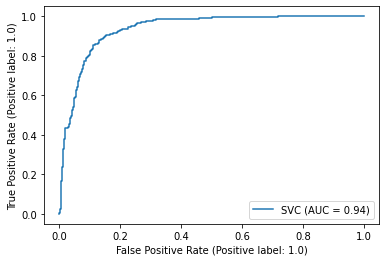

In [83]:
plot_roc_curve(model_12f, X_validation, Y_validation)

In [84]:
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(roc_auc_score(Y_validation,predictions))

[[434  29]
 [ 24 473]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       463
         1.0       0.94      0.95      0.95       497

    accuracy                           0.94       960
   macro avg       0.94      0.94      0.94       960
weighted avg       0.94      0.94      0.94       960

0.9445376361842763


# Test

In [85]:
##col features
col6=['F1',"F2","F3","F4","F5",'F6',"F7"]
col12=['F1',"F2","F3","F4","F5",'F6',"F7", "F8", "F9", "F10", "F11", "F12", "F13"]

## Model_2 - 6 frames

In [133]:
test_model_2 = pd.read_csv('../csv/model_2.csv')
test_model_2 = test_model_2.loc[:, ~test_model_2.columns.str.contains('^Unnamed')]

In [134]:
test_model_2

,frame,ear,threshold,mov_ear_3,mov_ear_5,mov_ear_7
0,0,1.0,0,NaN,NaN,NaN
1,1,1.0,0,NaN,NaN,NaN
2,2,1.0,0,1.0,NaN,NaN
3,3,1.0,0,1.0,1.0,NaN
4,4,1.0,0,1.0,1.0,1.0
...,...,...,...,...,...,...
1411,1411,1.0,0,1.0,1.0,1.0
1412,1412,1.0,0,1.0,1.0,1.0
1413,1413,1.0,0,1.0,1.0,1.0
1414,1414,1.0,0,1.0,1.0,NaN


In [135]:
listear=list(test_model_2.ear)

#normalizzo
listear = np.array(listear)
listear = (listear-np.nanmin(listear)) / (np.nanmax(listear)-np.nanmin(listear))
listear = list(listear)
LIST_EAR_PER_TABELLA_PREVISIONI = listear
LIST_EAR_PER_TABELLA_PREVISIONI = pd.Series(LIST_EAR_PER_TABELLA_PREVISIONI, index=range(0,len(LIST_EAR_PER_TABELLA_PREVISIONI)))

df_test_model_2_6f = pd.DataFrame(columns=col6)

# get 6frames separate
for i in range(3, len(listear)-4):
    tmp_ear = listear[i-3:i+4]
    df_test_model_2_6f.loc[i] = tmp_ear

# for i in range(6, len(listear)-7):
#     tmp_ear=listear[i-6:i+7]
#     df_fin.loc[i]=tmp_ear
    
df_test_model_2_6f.index.name="frame"
df_test_model_2_6f.dropna(how='any', inplace=True)

In [136]:
df_test_model_2_6f

,F1,F2,F3,F4,F5,F6,F7
frame,,,,,,,
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
1407,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1408,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1409,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [137]:
previsioni_model2_6f = prev_to_csv(df_test_model_2_6f, scaler=scaler_6f,model=model_6f)

In [138]:
previsioni_model2_6f

,blink
frame,
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
...,...
1407,0.0
1408,0.0
1409,0.0


In [139]:
unique, counts = np.unique(previsioni_model2_6f, return_counts=True)
dict_2_6 = dict(zip(unique, counts))

## Model_2 - 12 frames

In [140]:
listear=list(test_model_2.ear)

#normalizzo
listear = np.array(listear)
listear = (listear-np.nanmin(listear)) / (np.nanmax(listear)-np.nanmin(listear))
listear = list(listear)
LIST_EAR_PER_TABELLA_PREVISIONI = listear
LIST_EAR_PER_TABELLA_PREVISIONI = pd.Series(LIST_EAR_PER_TABELLA_PREVISIONI, index=range(0,len(LIST_EAR_PER_TABELLA_PREVISIONI)))

df_test_model_2_12f = pd.DataFrame(columns=col12)

# get 12frames separate
for i in range(6, len(listear)-7):
    tmp_ear=listear[i-6:i+7]
    df_test_model_2_12f.loc[i]=tmp_ear
    
df_test_model_2_12f.index.name="frame"
df_test_model_2_12f.dropna(how='any', inplace=True)

In [141]:
df_test_model_2_12f

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
frame,,,,,,,,,,,,,
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1405,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1406,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [142]:
previsioni_model2_12f = prev_to_csv(df_test_model_2_12f, scaler=scaler_12f, model=model_12f)

In [143]:
previsioni_model2_12f

,blink
frame,
6,1.0
7,1.0
8,1.0
9,1.0
10,1.0
...,...
1404,1.0
1405,1.0
1406,1.0


In [144]:
unique, counts = np.unique(previsioni_model2_12f, return_counts=True)
dict_2_12 = dict(zip(unique, counts))

## Model_4 - 6 frames

In [145]:
test_model_4 = pd.read_csv('../csv/model_4.csv')
test_model_4 = test_model_4.loc[:, ~test_model_4.columns.str.contains('^Unnamed')]

In [146]:
test_model_4

,frame,ear,threshold,mov_ear_3,mov_ear_5,mov_ear_7
0,0,1.0,0,NaN,NaN,NaN
1,1,1.0,0,NaN,NaN,NaN
2,2,1.0,0,1.0,NaN,NaN
3,3,1.0,0,1.0,1.0,NaN
4,4,1.0,0,1.0,1.0,1.0
...,...,...,...,...,...,...
1411,1411,1.0,0,1.0,1.0,1.0
1412,1412,1.0,0,1.0,1.0,1.0
1413,1413,1.0,0,1.0,1.0,1.0
1414,1414,1.0,0,1.0,1.0,NaN


In [147]:
listear=list(test_model_4.ear)

#normalizzo
listear = np.array(listear)
listear = (listear-np.nanmin(listear)) / (np.nanmax(listear)-np.nanmin(listear))
listear = list(listear)
LIST_EAR_PER_TABELLA_PREVISIONI = listear
LIST_EAR_PER_TABELLA_PREVISIONI = pd.Series(LIST_EAR_PER_TABELLA_PREVISIONI, index=range(0,len(LIST_EAR_PER_TABELLA_PREVISIONI)))

df_test_model_4_6f = pd.DataFrame(columns=col6)

# get 6frames separate
for i in range(3, len(listear)-4):
    tmp_ear = listear[i-3:i+4]
    df_test_model_4_6f.loc[i] = tmp_ear

# for i in range(6, len(listear)-7):
#     tmp_ear=listear[i-6:i+7]
#     df_fin.loc[i]=tmp_ear
    
df_test_model_4_6f.index.name="frame"
df_test_model_4_6f.dropna(how='any', inplace=True)

In [148]:
df_test_model_4_6f

,F1,F2,F3,F4,F5,F6,F7
frame,,,,,,,
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
1407,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1408,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1409,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [149]:
previsioni_model4_6f = prev_to_csv(df_test_model_4_6f, scaler=scaler_6f,model=model_6f)

In [150]:
previsioni_model4_6f

,blink
frame,
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
...,...
1407,0.0
1408,0.0
1409,0.0


In [151]:
unique, counts = np.unique(previsioni_model4_6f, return_counts=True)
dict_4_6 = dict(zip(unique, counts))

## Model_4 - 12 frames

In [152]:
listear=list(test_model_4.ear)

#normalizzo
listear = np.array(listear)
listear = (listear-np.nanmin(listear)) / (np.nanmax(listear)-np.nanmin(listear))
listear = list(listear)
LIST_EAR_PER_TABELLA_PREVISIONI = listear
LIST_EAR_PER_TABELLA_PREVISIONI = pd.Series(LIST_EAR_PER_TABELLA_PREVISIONI, index=range(0,len(LIST_EAR_PER_TABELLA_PREVISIONI)))

df_test_model_4_12f = pd.DataFrame(columns=col12)

# get 12frames separate
for i in range(6, len(listear)-7):
    tmp_ear=listear[i-6:i+7]
    df_test_model_4_12f.loc[i]=tmp_ear
    
df_test_model_4_12f.index.name="frame"
df_test_model_4_12f.dropna(how='any', inplace=True)

In [153]:
df_test_model_4_12f

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
frame,,,,,,,,,,,,,
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1405,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1406,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [154]:
previsioni_model4_12f = prev_to_csv(df_test_model_4_12f, scaler=scaler_12f, model=model_12f)

In [155]:
previsioni_model4_12f

,blink
frame,
6,1.0
7,1.0
8,1.0
9,1.0
10,1.0
...,...
1404,1.0
1405,1.0
1406,1.0


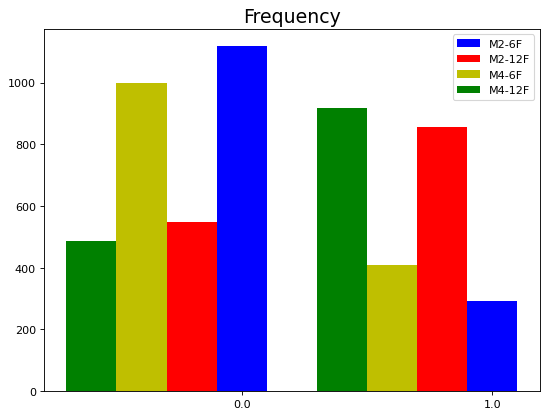

M2-6f {0.0: 1118, 1.0: 291}
M2-12f {0.0: 547, 1.0: 856}
M4-6f {0.0: 1000, 1.0: 409}
M4-12f {0.0: 487, 1.0: 916}


In [181]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

X = np.arange(len(dict_2_6))
ax = plt.subplot(111)
ax.bar(X, dict_2_6.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, dict_2_12.values(), width=0.2, color='r', align='center')
ax.bar(X-0.4, dict_4_6.values(), width=0.2, color='y', align='center')
ax.bar(X-0.6, dict_4_12.values(), width=0.2, color='g', align='center')

ax.legend(('M2-6F','M2-12F', 'M4-6F', 'M4-12F'))
plt.xticks(X, dict_2_6.keys())
plt.title("Frequency", fontsize=17)
plt.show()

print('M2-6f',dict_2_6)
print('M2-12f',dict_2_12)
print('M4-6f',dict_4_6)
print('M4-12f',dict_4_12)

In [183]:
previsioni_model2_6f.to_csv('output_SVM_model_2_6f.csv', index=True, header=True)
previsioni_model2_12f.to_csv('output_SVM_model_2_12f.csv', index=True, header=True)
previsioni_model4_6f.to_csv('output_SVM_model_4_6f.csv', index=True, header=True)
previsioni_model4_12f.to_csv('output_SVM_model_4_12f.csv', index=True, header=True)